In [1]:
#written 1.17.24 by @caramnix (last udpdated 1.25)

#goal: have a single csv for each congress with the following columns 
#Tweet- date- icpsr- member name - party - female - black - cleaned text- sentiment score 

# currently tweet data is stored in separate csv's so we want to merge them together -- nope used cat *.csv >combined.csv
# to combine so data is stored in combined_115,6,7.csv 

#so now want to read this in! do think it may have made more sense to do in chunks but idk we'll see 


In [2]:
import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
from datetime import datetime

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/caranix/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
tweets_116= pd.read_csv("/Users/caranix/Library/CloudStorage/OneDrive-TheOhioStateUniversity/CS MS/legislative tweets analysis/cleaned_116_ordered/combined_116.csv")



In [5]:
#tweets_116.head()

In [ ]:
tweets_116.iloc[400:450] # note, header column incuded-- need to remove 

In [7]:
## clean data, https://www.dataknowsall.com/textcleaning.html

def label_header(text):
    if "index" in text: 
        return 1 
    else: 
        return 0 


In [8]:
tweets_116['header'] = tweets_116['index'].apply(lambda x: label_header(x))

In [9]:
# remove headers
tweets_116= tweets_116[tweets_116['header']  == 0]

In [10]:
len(tweets_116)

1016907

In [11]:
## clean data, https://www.dataknowsall.com/textcleaning.html

def clean_string(text):

    final_string = ""

    # Make lower
    text = text.lower()

    # Remove line breaks
    text = re.sub(r'\n', '', text)

    # Remove emojis 
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    
    text= emoji_pattern.sub(r'', text)
    
    # Remove puncuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    text = text.split()
    useless_words = [] 
    text_filtered = [word for word in text if not word in useless_words]
    
    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]
    
    final_string = ' '.join(text_filtered)
    
    return final_string


In [12]:
## clean data, https://www.dataknowsall.com/textcleaning.html

def stem_string(text, stem="None"):

    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + ['hi', 'im']

    text_filtered = [word for word in text if not word in useless_words]

    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string


In [13]:
#stem_string("mccarthy earned the right to be the speaker an")

In [14]:
tweets_116['text']= tweets_116['text'].astype(str)

In [15]:
tweets_116['text_clean'] = tweets_116['text'].apply(lambda x: clean_string(x))
tweets_116['text_clean_stem'] = tweets_116['text_clean'].apply(lambda x: stem_string(x, stem='Stem'))

In [16]:
tweets_116['referenced_tweets']= tweets_116['referenced_tweets'].astype(str)

In [17]:
## clean data, https://www.dataknowsall.com/textcleaning.html

def label_rt(text):
    if "retweeted" in text: 
        return 1 
    else: 
        return 0 



In [18]:
tweets_116['RT'] = tweets_116['referenced_tweets'].apply(lambda x: label_rt(x))

In [19]:
tweets_116_cut = tweets_116[tweets_116["RT"] == 0]

In [20]:
#tweets_116_retweets= tweets_116[tweets_116["RT"] == 1]
#agree that RT's should be cut 

In [ ]:
tweets_116_cut

In [184]:
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#analyzer = SentimentIntensityAnalyzer()
#sentence = "The food was great!"
#vs = analyzer.polarity_scores(sentence)
#print("{:-<65} {}".format(sentence, str(vs)))

In [ ]:
#he compound score is computed by summing the valence scores of each word in the lexicon, 
#adjusted according to the rules, and then normalized to be between -1 (most extreme negative) 
#and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional 
#measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.




In [41]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_score(text): 
    vs= analyzer.polarity_scores(text)
    return vs['compound']

In [42]:
tweets_116_cut['vader_score'] = tweets_116_cut['text_clean'].apply(lambda x: vader_score(x))

/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_11623/1385670314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_116_cut['vader_score'] = tweets_116_cut['text_clean'].apply(lambda x: vader_score(x))


In [ ]:
tweets_116_cut.head()

In [ ]:
tweets_116_cut.loc[944630:944635]

In [45]:
tweets_116_cut= tweets_116_cut.drop([944632]) # ONE PROBLEM ONE! 

In [46]:
# read in demographics from 116th (party, gender, race)

path= "/Users/caranix/Library/CloudStorage/OneDrive-TheOhioStateUniversity/CS MS/legislative tweets analysis/"

leg_116= pd.read_csv(path + "116_leg_les.csv")

In [47]:
#leg_116.columns

In [48]:
leg_116_s= leg_116[["handle", "icpsr", "Female", "party_code", "African.American", "Latinx"]]


In [49]:
leg_116_s

,handle,icpsr,Female,party_code,African.American,Latinx
0,repdonyoung,14066.0,0.0,200,0.0,0.0
1,JimPressOffice,14657.0,0.0,200,0.0,0.0
2,RepHalRogers,14854.0,0.0,200,0.0,0.0
3,RepChrisSmith,14863.0,0.0,200,0.0,0.0
4,LeaderHoyer,14873.0,0.0,100,0.0,0.0
...,...,...,...,...,...,...
510,NaN,21989.0,0.0,200,0.0,0.0
511,NaN,21991.0,0.0,100,1.0,0.0
512,NaN,21990.0,0.0,200,0.0,0.0
513,NaN,21988.0,0.0,200,0.0,1.0


In [228]:
#leg_117_s= leg_117_s.rename(columns={"state_abbrev.y": "state_abbrev", "party_code.y": "party_code"})

In [31]:
## to lower handles and usernames 

leg_116_s['handle']= leg_116_s['handle'].str.lower()
tweets_116_cut["username"] = tweets_116_cut["username"].str.lower()

/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_11623/3833778432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leg_116_s['handle']= leg_116_s['handle'].str.lower()
/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_11623/3833778432.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_116_cut["username"] = tweets_116_cut["username"].str.lower()


In [50]:
tweets_116_merged= tweets_116_cut.merge(leg_116_s, how='left', left_on='username', right_on="handle")

In [ ]:
tweets_116_merged

In [53]:
#tweets_116_merged.to_csv("tweets_116_merged.csv")

In [54]:
tweets_116_merged

Index(['index', 'source', 'lang', 'text', 'possibly_sensitive', 'author_id',
       'id', 'conversation_id', 'created_at', 'entities.mentions',
       'entities.hashtags', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.quote_count', 'entities.annotations', 'entities.urls',
       'referenced_tweets', 'attachments.media_keys', 'in_reply_to_user_id',
       'username', 'header', 'text_clean', 'text_clean_stem', 'RT',
       'vader_score', 'handle', 'icpsr', 'Female', 'party_code',
       'African.American', 'Latinx'],
      dtype='object')

In [3]:
tweets_116_merged = pd.read_csv("/Users/caranix/Library/CloudStorage/OneDrive-TheOhioStateUniversity/CS MS/legislative tweets analysis/tweets_116_merged.csv")


/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_1058/2270933907.py:1: DtypeWarning: Columns (1,5,6,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_116_merged = pd.read_csv("/Users/caranix/Library/CloudStorage/OneDrive-TheOhioStateUniversity/CS MS/legislative tweets analysis/tweets_116_merged.csv")


In [4]:
np.mean(tweets_116_merged['vader_score'])

0.2331786342956074

In [5]:
# rep mean for 116
np.mean(tweets_116_merged[tweets_116_merged['party_code'] == 200.0]['vader_score'])

0.27918722471240814

In [6]:
# democrats more positive tweets than reps 
np.mean(tweets_116_merged[tweets_116_merged['party_code'] == 100.0]['vader_score'])

0.21247190748219635

In [7]:
# can we plot sentiment by party over time? average by week? 

In [8]:
date_2_parts= tweets_116_merged.created_at.str.split("T", n=1, expand=True)
tweets_116_merged['date'] = date_2_parts[0]
tweets_116_merged['date'] =  pd.to_datetime(tweets_116_merged['date'], format='%Y-%m-%d')

In [9]:
tweets_116_merged['date'] = date_2_parts[0]


In [10]:
tweets_116_merged['date'] =  pd.to_datetime(tweets_116_merged['date'], format='%Y-%m-%d')

<Axes: xlabel='date'>

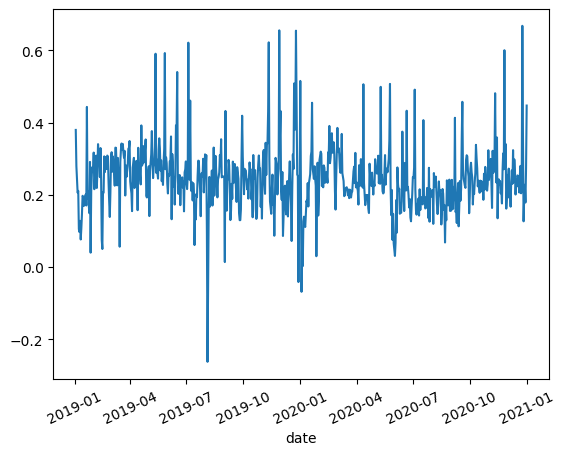

In [11]:
import matplotlib.pyplot as plt

tweets_116_merged.groupby(tweets_116_merged['date'].dt.date)["vader_score"].mean().plot(kind="line",rot=25)

In [12]:
import seaborn as sns 

In [13]:
tweets_116_merged['party_code'].unique()

array([100., 200.,  nan, 328.])

In [14]:
tweets_116_merged["party"] = np.where(tweets_116_merged['party_code']== 200.0, "R",
                                      np.where(tweets_116_merged['party_code']== 328.0, "R",
                                      np.where(tweets_116_merged['party_code']== 100.0, "D", "nan")))
                                      
                                      
                                      
                                      

In [ ]:
# 9 na tweets, from repwatkins, let's delete them! 
tweets_116_merged[tweets_116_merged["party"] =="nan"]

In [16]:
tweets_116_merged= tweets_116_merged[tweets_116_merged["party"] !="nan"]

In [ ]:
tweets_116_merged

In [18]:
tweets_116_merged.iloc[11].text_clean

'i am constantly asked if i‘d support the dem nominee could you imagine if i said i wouldn’tyet biden’s camp is on tv threatening to help trump if they don’t get exactly what they wantthis is profoundly irresponsible on all ends our country is not a game get it together '

In [19]:
#tweets_116_merged["party_temp"] = np.where(tweets_116_merged['party_code']== 200.0, "R",
#                                           np.where(tweets_116_merged['party_code']== 328.0, "R", "D"))
                                           
                                      
                     

In [20]:
palette = {
    "R": '#fc1414',
    "D": '#1f1fff',
}

/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_1058/2384204153.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=tweets_116_merged, x="date", y="vader_score", hue= "party", palette= palette, ci = None)


Text(0.5, 1.0, 'Average Sentiment on Twitter by Party- 116th Congress')

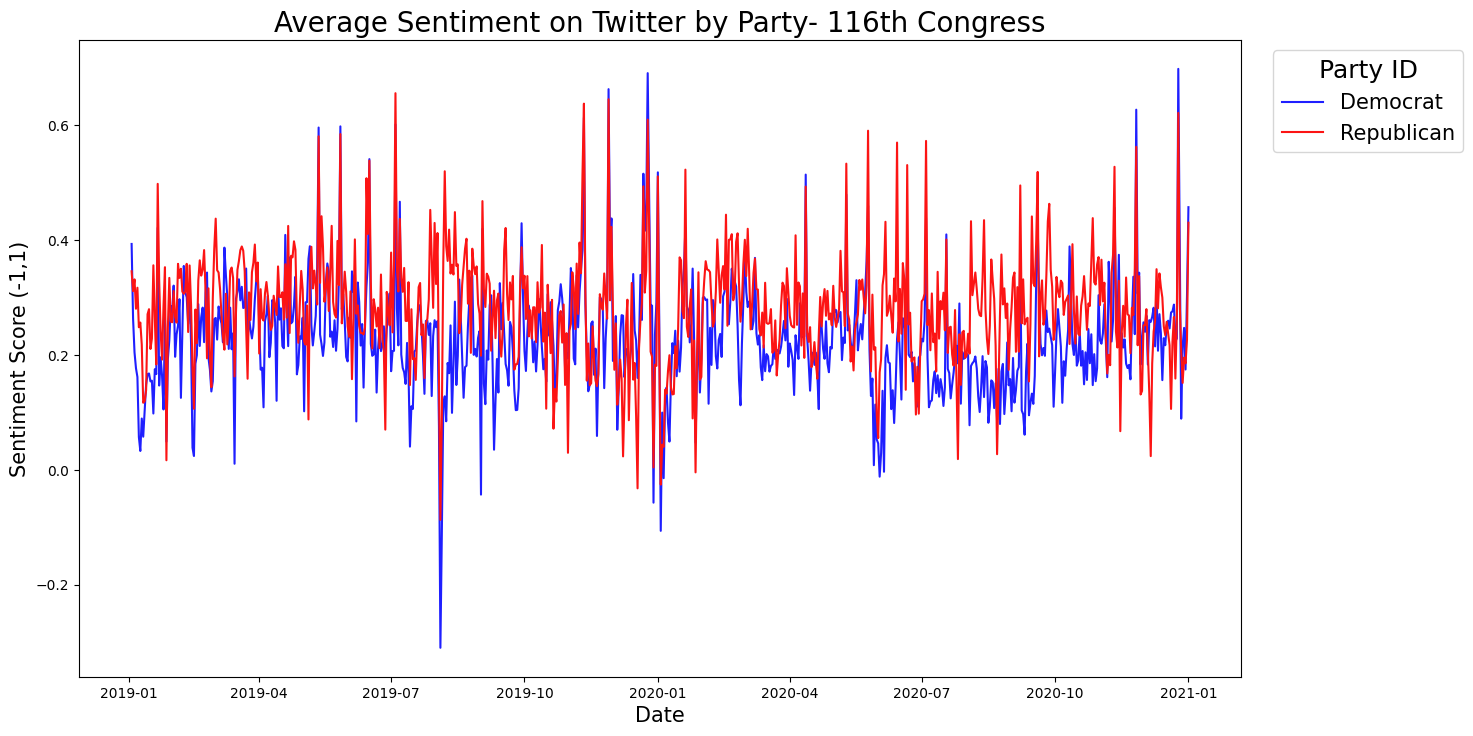

In [40]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,8.27

#plt.axhline(y=0, color="grey") 
sns.lineplot(data=tweets_116_merged, x="date", y="vader_score", hue= "party", palette= palette, ci = None)
plt.legend(title='Party ID', loc='upper right', labels=['Democrat', 'Republican'],  bbox_to_anchor=(1.2, 1), title_fontsize=18, fontsize="15")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Sentiment Score (-1,1)", fontsize=15)

plt.title("Average Sentiment on Twitter by Party- 116th Congress", fontsize=20)


#plt.savefig('sentiment_116.png', dpi=400)

In [44]:
tweets_116_merged['7day_rolling_avg'] = tweets_116_merged.vader_score.rolling(7).mean()

In [46]:
tweets_116_merged['10day_rolling_avg'] = tweets_116_merged.vader_score.rolling(10).mean()

/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_1058/2678352871.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=tweets_116_merged, x="date", y="vader_score", hue= "party", palette= palette, ci = None)


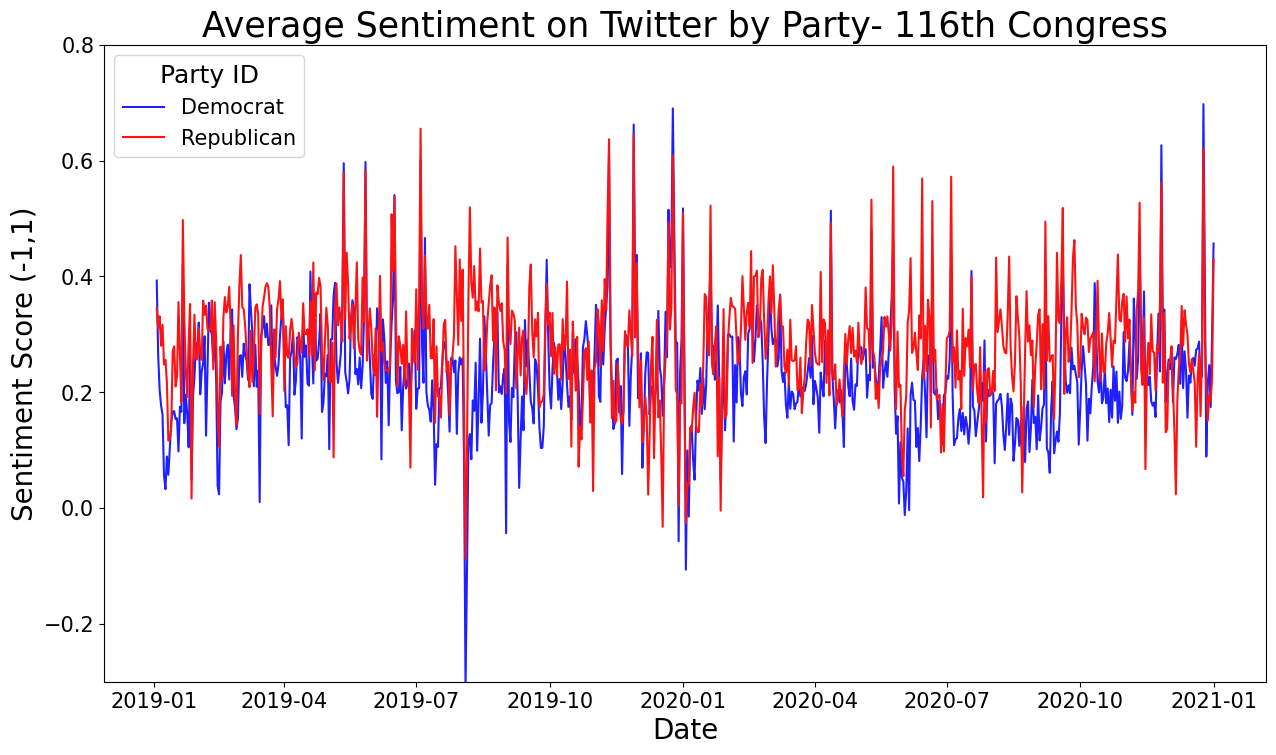

In [67]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,8.27

#plt.axhline(y=0, color="grey") 
sns.lineplot(data=tweets_116_merged, x="date", y="vader_score", hue= "party", palette= palette, ci = None)
plt.legend(title='Party ID', loc='upper left', labels=['Democrat', 'Republican'], title_fontsize=18, fontsize="15") #bbox_to_anchor=(1.15, 1)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Sentiment Score (-1,1)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-.3,.8)
plt.title("Average Sentiment on Twitter by Party- 116th Congress", fontsize=25)


plt.savefig('sentiment_116_v3.png', dpi=500, bbox_inches="tight")
#v2 = 7dayrolling avg 

/var/folders/09/l3m63nj90fg1l2jshjp_hd5w0000gn/T/ipykernel_12035/2392790081.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=tweets_116_merged, x="date", y="vader_score", hue= "party", palette= palette, ci = None)


Text(0.5, 1.0, 'Average Sentiment on Twitter by Party- 116th Congress')

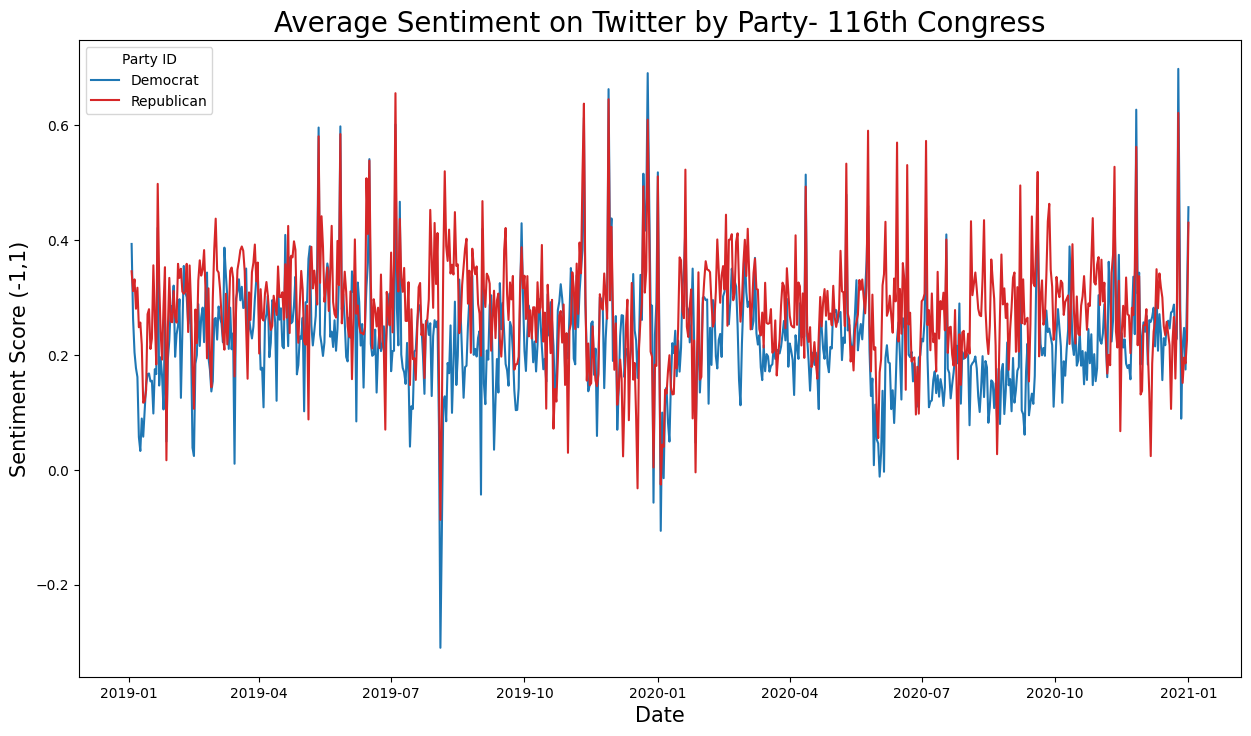

In [67]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,8.27

#plt.axhline(y=0, color="grey") 
sns.lineplot(data=tweets_116_merged, x="date", y="vader_score", hue= "party", palette= palette, ci = None)
plt.legend(title='Party ID', loc='upper left', labels=['Democrat', 'Republican'])
plt.xlabel("Date", fontsize=15)
plt.ylabel("Sentiment Score (-1,1)", fontsize=15)

plt.title("Average Sentiment on Twitter by Party- 116th Congress", fontsize=20)


#plt.savefig('sentiment_116.png', dpi=400)

In [107]:
## old code which found & delt w/ NA's 
## wait, what values are Na's 

handles_we_have_tweets_for = tweets_116_cut["username"].unique()
legs_we_have_info_for= leg_116_s["handle"].unique()


In [108]:
def Intersection(lst1, lst2):
    return set(lst1).intersection(lst2)

overlap= list(Intersection(handles_we_have_tweets_for, legs_we_have_info_for))#396 overlap

In [109]:
#in first but not in 2nd
s = set(overlap)
temp3 = [x for x in handles_we_have_tweets_for if x not in s]
print(temp3)

#added these by hand for 117: ['repamata', 'repbourdeaux', 'repcicilline', 'repdanbishop', 'repjacobs', 'repjamescomer', 'repjenniffer', 'repmikegarcia', 'reptiffany', 'repyoungkim'] 

['dennyheck', 'donnashalala', 'joekennedy', 'repjamescomer', 'repwatkins', 'seanduffywi', 'teamroby', 'benmcadams', 'hornforcongress', 'tomreedcongress', 'tomreedny23']


In [ ]:
repwatkins -- christine watkins 

In [121]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)

text = emoji_pattern.sub(r'', tweets_117_cut.loc[742355].text_clean)


In [122]:
text

'know bestpar liber elit teacher union washington bureaucrats'